In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import src.starter.utils as starter
import src.starter.visualize as vis
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np

tqdm.pandas()

In [2]:
data = pd.read_json("data/kits.json")\
         .assign(case_nid=lambda x: x['case_id'].str.slice(start=5))

In [3]:
def case_stats(case_id):
    im, mask = starter.load_case(case_id)
    im_data = im.get_data()
    mask_data = mask.get_data()
    
    image_volume = np.prod(im_data.shape)
    kidney_volume = (mask_data == 1).sum()
    tumor_volume = (mask_data == 2).sum()
    
    num_slices, height, width = im.shape

    max_value = np.max(im_data)
    min_value = np.min(im_data)
    return pd.Series(index=["num_slices", "height", "width", "im_volume", "kidney_volume", "tumor_volume", "max_val", "min_val"], 
                     data=[num_slices, height, width, image_volume, kidney_volume, tumor_volume, max_value, min_value])


In [6]:
cases_data = data.progress_apply(lambda x: case_stats(x['case_nid']), axis=1)

100%|██████████| 210/210 [13:47<00:00,  2.16s/it]


In [7]:
data = pd.concat([data, cases_data], axis=1)

In [8]:
data.to_csv("data_stats.csv", index=False)

In [9]:
data

,captured_pixel_width,captured_slice_thickness,case_id,case_nid,num_slices,height,width,im_volume,kidney_volume,tumor_volume,max_val,min_val
0,0.919922,1.00,case_00000,00000,611.0,512.0,512.0,160169984.0,901262.0,18231.0,1413.0,-1024.0
1,0.798828,1.00,case_00001,00001,602.0,512.0,512.0,157810688.0,1424126.0,21965.0,1393.0,-1024.0
2,0.939453,2.00,case_00002,00002,261.0,512.0,512.0,68419584.0,606988.0,39224.0,3071.0,-1024.0
3,0.855469,2.00,case_00003,00003,270.0,512.0,512.0,70778880.0,531769.0,13926.0,3071.0,-1024.0
4,0.976562,4.00,case_00004,00004,64.0,512.0,512.0,16777216.0,113183.0,4932.0,2125.0,-1024.0
5,0.976562,1.00,case_00005,00005,834.0,512.0,512.0,218628096.0,893786.0,126257.0,3071.0,-1024.0
6,0.742188,3.00,case_00006,00006,157.0,512.0,512.0,41156608.0,238855.0,6351.0,1782.0,-1024.0
7,0.939453,3.00,case_00007,00007,61.0,512.0,512.0,15990784.0,202014.0,7058.0,1088.0,-1024.0
8,0.816406,3.00,case_00008,00008,227.0,512.0,512.0,59506688.0,242822.0,298753.0,3071.0,-1024.0
9,0.808594,3.00,case_00009,00009,77.0,512.0,512.0,20185088.0,158339.0,4807.0,1374.0,-1024.0


### Interpolated data

In [11]:
data_interpolated = pd.read_json("data_interpolated/kits.json")\
                     .assign(case_nid=lambda x: x['case_id'].str.slice(start=5))[['case_id','case_nid']]

In [12]:
data_interpolated.head()

,case_id,case_nid
0,case_00000,00000
1,case_00001,00001
2,case_00002,00002
3,case_00003,00003
4,case_00004,00004


In [18]:
def case_interpolated_stats(case_id):
    im, mask = starter.load_case(case_id, interpolated=True)
    spacing = im.affine
    captured_pixel_width = -spacing[0][2]
    captured_slice_thickness = -spacing[2][0]
    im_data = im.get_data()
    mask_data = mask.get_data()
    
    image_volume = np.prod(im_data.shape)
    kidney_volume = (mask_data == 1).sum()
    tumor_volume = (mask_data == 2).sum()
    
    num_slices, height, width = im.shape

    max_value = np.max(im_data)
    min_value = np.min(im_data)
    return pd.Series(index=["captured_pixel_width", "captured_slice_thickness", "num_slices", "height", "width", "im_volume", "kidney_volume", "tumor_volume", "max_val", "min_val"], 
                     data=[captured_pixel_width, captured_slice_thickness, num_slices, height, width, image_volume, kidney_volume, tumor_volume, max_value, min_value])

In [19]:
cases_data_interpolated = data_interpolated.progress_apply(lambda x: case_interpolated_stats(x['case_nid']), axis=1)
data_interpolated = pd.concat([data_interpolated, cases_data_interpolated], axis=1)
data_interpolated.head()

100%|██████████| 210/210 [06:55<00:00,  2.31s/it]


,case_id,case_nid,captured_pixel_width,captured_slice_thickness,num_slices,height,width,im_volume,kidney_volume,tumor_volume,max_val,min_val
0,case_00000,00000,0.781625,3.0,101.0,602.0,602.0,36602804.0,209748.0,4160.0,1401.961975,-1186.121007
1,case_00001,00001,0.781625,3.0,100.0,523.0,523.0,27352900.0,258749.0,3980.0,1359.246689,-1145.844500
2,case_00002,00002,0.781625,3.0,87.0,615.0,615.0,32905575.0,294812.0,18957.0,3343.043116,-1182.132917
3,case_00003,00003,0.781625,3.0,90.0,560.0,560.0,28224000.0,214001.0,5562.0,3348.967606,-1169.952149
4,case_00004,00004,0.781625,3.0,85.0,639.0,639.0,34707285.0,239867.0,10301.0,1945.979405,-1168.166711


In [20]:
data_interpolated.to_csv("data_interpolated_stats.csv", index=False)

### Exploration

In [151]:
from os.path import join as pjoin
import glob
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['image.cmap'] = 'inferno'
    
data = pd.read_csv("data_interpolated_stats.csv")

captured_pixel_width = data.loc[0]['captured_pixel_width']
captured_slice_thickness = data.loc[0]['captured_slice_thickness']


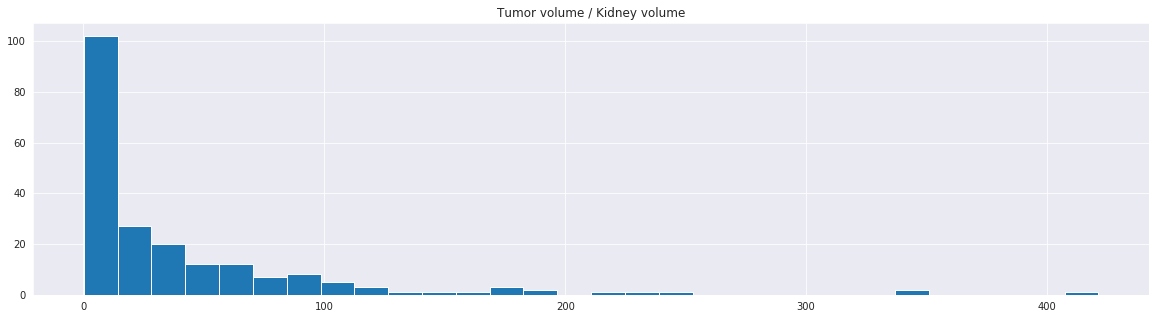

In [152]:
mpl.rcParams['figure.figsize'] = (20,5)
(data.kidney_volume / data.tumor_volume).hist(bins=30)
plt.title('Tumor volume / Kidney volume')
plt.show()
# data.head()

### Train / Val split

kidney_volume_bin_edges: len 16
[49571.0, 83553.0, 117535.0, 151517.0, 185499.0, 219481.0, 253463.0, 287445.0, 321427.0, 355409.0, 389391.0, 423373.0, 457355.0, 491337.0, 525319.0, 559301.0]


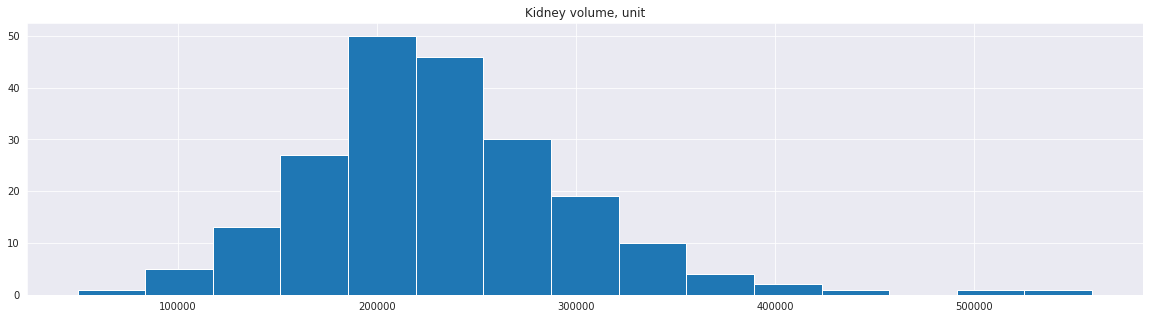

> modification (group outliers): len 7
[49571.0, 117535.0, 151517.0, 185499.0, 253463.0, 321427.0, 559301.0]


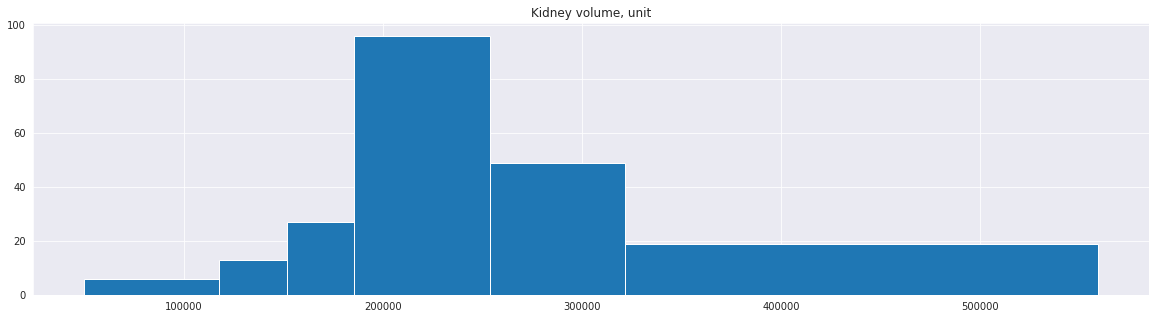

tumor_volume_bin_edges: len 16
[390.0, 53625.86666666667, 106861.73333333334, 160097.6, 213333.46666666667, 266569.3333333334, 319805.2, 373041.06666666665, 426276.93333333335, 479512.80000000005, 532748.6666666667, 585984.5333333333, 639220.4, 692456.2666666667, 745692.1333333333, 798928.0]


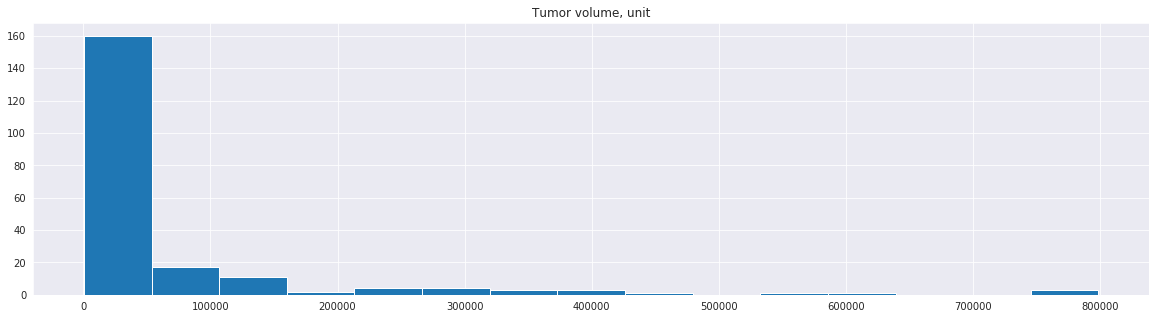

> modification (group outliers): len 3
[390.0, 106861.73333333334, 798928.0]


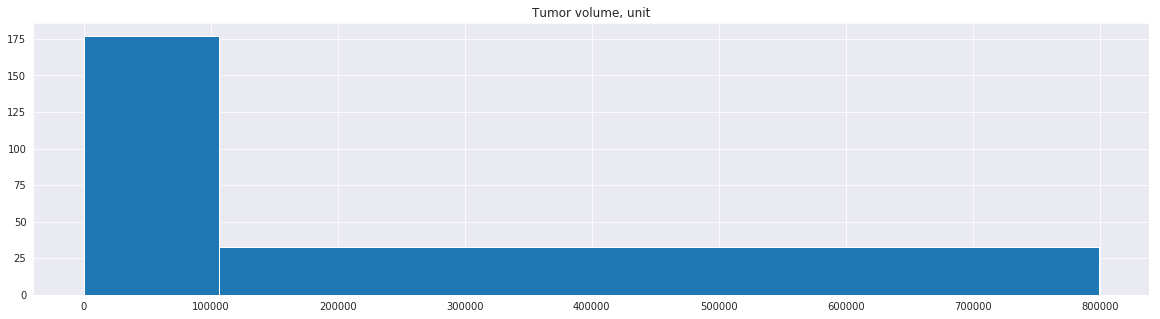

In [245]:
nbins = 15

kidney_volume_bin_edges = list(np.histogram(data.kidney_volume, bins=nbins)[1])
print('kidney_volume_bin_edges: len', len(kidney_volume_bin_edges))
print(kidney_volume_bin_edges)
data.kidney_volume.hist(bins=kidney_volume_bin_edges)
plt.title('Kidney volume, unit')
plt.show()

del kidney_volume_bin_edges[1:2]
del kidney_volume_bin_edges[-11]
del kidney_volume_bin_edges[-9:-8]
del kidney_volume_bin_edges[-7:-1]
print('> modification (group outliers): len', len(kidney_volume_bin_edges))
print(kidney_volume_bin_edges)
data.kidney_volume.hist(bins=kidney_volume_bin_edges)
plt.title('Kidney volume, unit')
plt.show()

tumor_volume_bin_edges = list(np.histogram(data.tumor_volume, bins=nbins)[1])
print('tumor_volume_bin_edges: len', len(tumor_volume_bin_edges))
print(tumor_volume_bin_edges)
data.tumor_volume.hist(bins=tumor_volume_bin_edges)
plt.title('Tumor volume, unit')
plt.show()

del tumor_volume_bin_edges[-15]
del tumor_volume_bin_edges[-13:-1]
print('> modification (group outliers): len', len(tumor_volume_bin_edges))
print(tumor_volume_bin_edges)
data.tumor_volume.hist(bins=tumor_volume_bin_edges)
plt.title('Tumor volume, unit')
plt.show()

In [272]:
def get_bin_number(value, bin_edges):
    bin_number = np.where(np.array(
        [value >= bin_edges[i] and
         value <= bin_edges[i+1]
         for i in range(len(bin_edges)-1)],
        dtype=np.uint8) > 0)[0][0]
    return bin_number

data['cv_split_label'] = [
    get_bin_number(x, kidney_volume_bin_edges) * len(tumor_volume_bin_edges) 
        + get_bin_number(y, tumor_volume_bin_edges)
    for _,(x,y) in data[['kidney_volume', 'tumor_volume']].iterrows()]
data.head()

assert data.cv_split_label.max() <= len(tumor_volume_bin_edges)  * len(kidney_volume_bin_edges)

# for g in data.cv_split_label.groupby(data.cv_split_label):
#     print(len(g[1]))

from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(data.case_id, test_size=0.2, stratify=data.cv_split_label)
# print(train_set)
# print(val_set)

### Check distribution of train / val

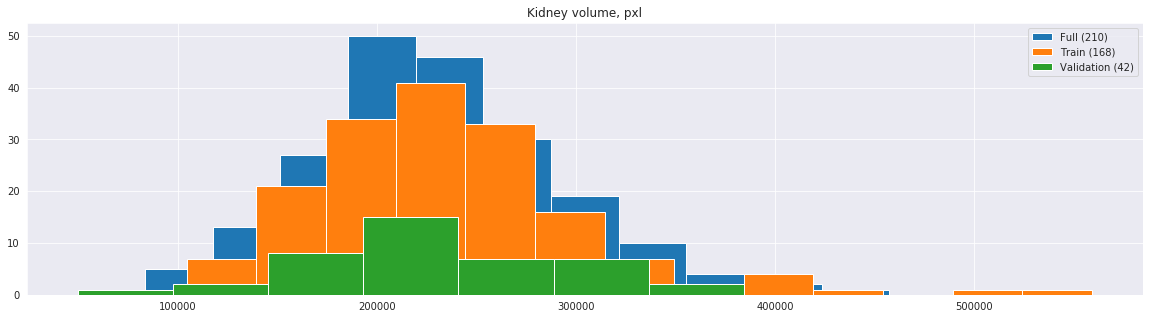

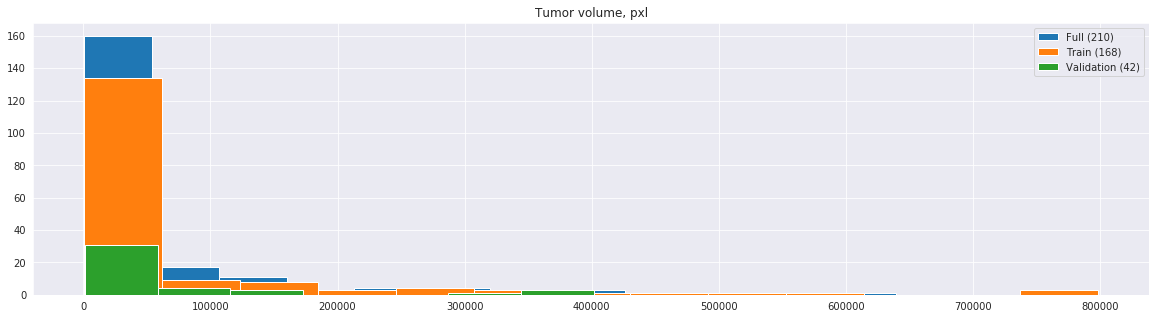

In [273]:
train_data = data.iloc[train_set.index]
val_data = data.iloc[val_set.index]

data.kidney_volume.hist(bins='sqrt')
train_data.kidney_volume.hist(bins='sqrt')
val_data.kidney_volume.hist(bins='sqrt')
plt.legend(['Full ({})'.format(len(data)), 'Train ({})'.format(len(train_data)), 'Validation ({})'.format(len(val_data))])
plt.title('Kidney volume, pxl')
plt.show()

data.tumor_volume.hist(bins='sqrt')
train_data.tumor_volume.hist(bins='sqrt')
val_data.tumor_volume.hist(bins='sqrt')
plt.legend(['Full ({})'.format(len(data)), 'Train ({})'.format(len(train_data)), 'Validation ({})'.format(len(val_data))])
plt.title('Tumor volume, pxl')
plt.show()

In [276]:
train_data.to_csv("train_data_interpolated_stats.csv", index=False)
val_data.to_csv("val_data_interpolated_stats.csv", index=False)